In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re


In [2]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
# sns.set_context("poster")


In [3]:
path = "results/linear_multi"
# path = "results/linear_multi/N500"
# path = "results/nonlinear_multi"
# path = "results/nonlinear_multi/trunc_parab"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/linear_multi\\linear_dgp_svi_1.csv', 'results/linear_multi\\linear_dgp_svi_10.csv', 'results/linear_multi\\linear_dgp_svi_11.csv', 'results/linear_multi\\linear_dgp_svi_12.csv', 'results/linear_multi\\linear_dgp_svi_13.csv', 'results/linear_multi\\linear_dgp_svi_14.csv', 'results/linear_multi\\linear_dgp_svi_15.csv', 'results/linear_multi\\linear_dgp_svi_16.csv', 'results/linear_multi\\linear_dgp_svi_17.csv', 'results/linear_multi\\linear_dgp_svi_18.csv', 'results/linear_multi\\linear_dgp_svi_19.csv', 'results/linear_multi\\linear_dgp_svi_2.csv', 'results/linear_multi\\linear_dgp_svi_23.csv', 'results/linear_multi\\linear_dgp_svi_25.csv', 'results/linear_multi\\linear_dgp_svi_27.csv', 'results/linear_multi\\linear_dgp_svi_3.csv', 'results/linear_multi\\linear_dgp_svi_35.csv', 'results/linear_multi\\linear_dgp_svi_4.csv', 'results/linear_multi\\linear_dgp_svi_5.csv', 'results/linear_multi\\linear_dgp_svi_6.csv', 'results/linear_multi\\linear_dgp_svi_7.csv', 'results/linear_mul

In [4]:
extracted_numbers = [re.findall(r'\d+', s) for s in all_file]
first_numbers = [int(numbers[0]) if numbers else None for numbers in extracted_numbers]
first_numbers.sort()
first_numbers

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 23,
 25,
 27,
 35]

In [5]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
print(combined_df)

       idx   mean  median   true   bias    std   RMSE  RMSE_all    MAE  \
0      1.0  2.529   2.529  2.513  0.016  0.059  0.110     0.162  0.091   
1      1.0  2.446   2.446  2.513 -0.067  0.076  0.316     0.415  0.232   
2      1.0  3.241   3.241  3.222  0.019  0.074  0.085     0.142  0.062   
3      1.0  3.128   3.128  3.222 -0.094  0.092  0.385     0.475  0.193   
4      1.0  1.781   1.781  2.513 -0.732  0.069  1.209     1.217  0.916   
..     ...    ...     ...    ...    ...    ...    ...       ...    ...   
155  504.0  2.663   2.662  3.085 -0.422  0.095  0.880     0.967  0.621   
156  504.0  2.487   2.487  2.545 -0.058  0.056  0.503     0.517  0.391   
157  504.0  2.411   2.412  2.545 -0.134  0.081  0.661     0.716  0.464   
158  504.0  2.983   2.983  3.085 -0.102  0.071  0.541     0.553  0.425   
159  504.0  2.806   2.811  3.085 -0.279  0.104  0.781     0.833  0.542   

     MAE_all   MAPE   q025   q975  covering  mean_ind_cover           method  \
0      0.125  0.205  2.413  2.6

In [6]:
combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all','MAPE', 'q025','q975','covering','mean_ind_cover']] = combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all','MAPE', 'q025','q975','covering', 'mean_ind_cover']].apply(pd.to_numeric, errors='coerce')

In [7]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']
combined_df['MAPE_manual'] = np.abs((combined_df['mean']-combined_df['TRUE'])/combined_df['TRUE'])

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [8]:
combined_df[combined_df["estimand"]=="dynamic"]

,idx,mean,median,true,bias,std,RMSE,RMSE_all,MAE,MAE_all,...,covering,mean_ind_cover,method,estimand,TRUE,model,type,abs_bias,ci_length,MAPE_manual
0,1.0,2.529,2.529,2.513,0.016,0.059,0.110,0.162,0.091,0.125,...,1.0,0.994,Linear_oracle,dynamic,NaN,Linear,Oracle,0.016,0.235,NaN
1,1.0,2.446,2.446,2.513,-0.067,0.076,0.316,0.415,0.232,0.286,...,1.0,0.912,GP_oracle,dynamic,NaN,GP,Oracle,0.067,0.295,NaN
4,1.0,1.781,1.781,2.513,-0.732,0.069,1.209,1.217,0.916,0.922,...,0.0,0.180,Linear_observed,dynamic,NaN,Linear,Obs.,0.732,0.270,NaN
5,1.0,1.210,1.211,2.513,-1.303,0.166,1.924,1.958,1.499,1.528,...,0.0,0.300,GP_observed,dynamic,NaN,GP,Obs.,1.303,0.644,NaN
8,1.0,2.345,2.343,2.513,-0.168,0.093,0.593,0.759,0.467,0.598,...,1.0,0.898,Linear_3S,dynamic,NaN,Linear,3S,0.168,0.366,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,504.0,1.769,1.769,2.545,-0.776,0.180,1.322,1.376,1.004,1.037,...,0.0,0.406,GP_observed,dynamic,NaN,GP,Obs.,0.776,0.709,NaN
152,504.0,2.394,2.393,2.545,-0.151,0.069,0.597,0.673,0.449,0.516,...,0.0,0.726,Linear_3S,dynamic,NaN,Linear,3S,0.151,0.271,NaN
154,504.0,2.309,2.309,2.545,-0.236,0.084,0.755,0.846,0.529,0.600,...,0.0,0.732,GP_3S,dynamic,NaN,GP,3S,0.236,0.327,NaN
156,504.0,2.487,2.487,2.545,-0.058,0.056,0.503,0.517,0.391,0.401,...,1.0,0.324,Linear_1S,dynamic,NaN,Linear,1S,0.058,0.221,NaN


In [9]:
# print dtype of each column 
print(combined_df.dtypes)

idx               float64
mean              float64
median            float64
true              float64
bias              float64
std               float64
RMSE              float64
RMSE_all          float64
MAE               float64
MAE_all           float64
MAPE              float64
q025              float64
q975              float64
covering          float64
mean_ind_cover    float64
method             object
estimand           object
TRUE              float64
model              object
type               object
abs_bias          float64
ci_length         float64
MAPE_manual       float64
dtype: object


In [10]:
def coverage_perc(x):
    return np.mean(x)*100

# df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {'mean' : ['mean'],
                                         'median' : ['mean'],
                                         'std' : ['mean'],
                                         'bias' : ['median'],
                                         'TRUE' : ['mean'],
                                         'RMSE' : ['median'],
                                         'RMSE_all' : ['median'],
                                         'MAE' : ['median'],
                                         'MAE_all' : ['median'],
                                         'MAPE' : ['median'],
                                         # 'MAPE_manual' : ['mean'],
                                         'q025' : ['median'],
                                         'q975' : ['median'],
                                         'ci_length' : ['median'],
                                         'covering' : [coverage_perc],
                                         'mean_ind_cover' : ['median']}).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary


,estimand,model,type,mean,median,std,bias,TRUE,RMSE,RMSE_all,MAE,MAE_all,MAPE,q025,q975,ci_length,covering,mean_ind_cover
,,,,mean,mean,mean,median,mean,median,median,median,median,median,median,median,median,coverage_perc,median
0,dynamic,GP,1S,2.434097,2.436579,0.149548,-0.0200,2.760790,0.6660,0.7225,0.4820,0.5165,1.1865,2.5360,2.8390,0.3060,81.140351,0.520
1,dynamic,GP,3S,2.388303,2.391031,0.157425,-0.1510,2.760790,0.7190,0.8565,0.5300,0.6350,1.2005,2.3940,2.7410,0.3520,58.771930,0.823
2,dynamic,GP,Obs.,1.896013,1.895939,0.159035,-0.8215,2.760790,1.5715,1.6150,1.2315,1.2570,3.4295,1.5790,2.2085,0.6055,2.192982,0.306
3,dynamic,GP,Oracle,2.664706,2.664781,0.066377,-0.0385,2.760790,0.3670,0.4425,0.1900,0.2515,0.3525,2.5460,2.7955,0.2560,90.350877,0.958
4,dynamic,Linear,1S,2.600171,2.600114,0.077504,0.0145,2.760790,0.5240,0.5375,0.4165,0.4265,1.0865,2.5860,2.8130,0.2275,76.315789,0.312
5,dynamic,Linear,3S,2.501772,2.499303,0.100276,-0.1025,2.760790,0.6025,0.7155,0.4690,0.5630,1.1680,2.4530,2.7430,0.2975,69.298246,0.792
6,dynamic,Linear,Obs.,2.267040,2.266921,0.065140,-0.4260,2.760790,1.0625,1.0700,0.7680,0.7755,1.2655,2.1600,2.4180,0.2530,0.877193,0.212
7,dynamic,Linear,Oracle,2.696540,2.696443,0.050110,-0.0025,2.760790,0.0970,0.1440,0.0770,0.1090,0.1725,2.5950,2.7915,0.1950,94.298246,1.000
8,stoch,GP,1S,2.928974,2.932579,0.179123,-0.0420,3.239421,0.7530,0.7995,0.5260,0.5520,0.3555,2.9860,3.3305,0.3430,82.456140,0.434


Text(0, 0.5, '')

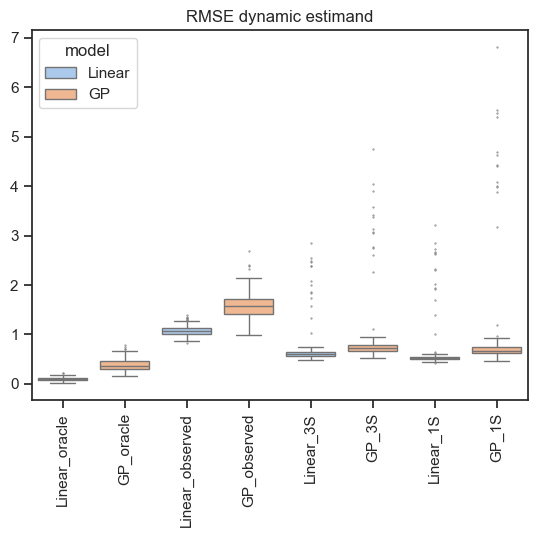

In [11]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=1,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "model", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

Text(0, 0.5, '')

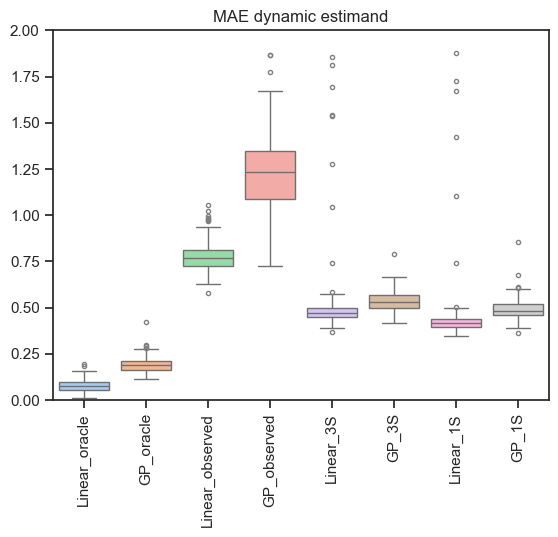

In [14]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'MAE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAE dynamic estimand")
plt.ylim(0,2)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

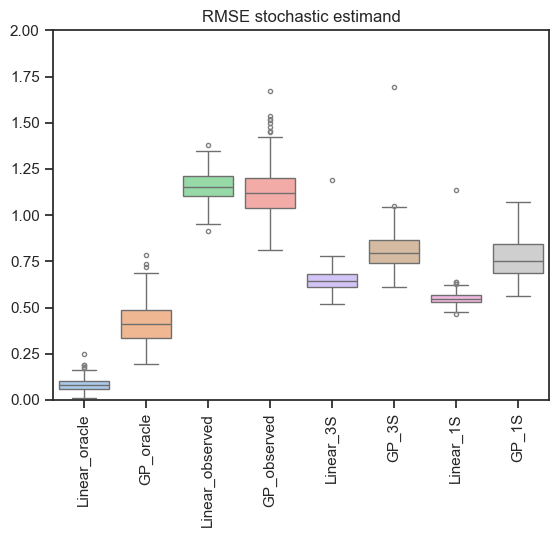

In [15]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE stochastic estimand")
plt.ylim(0,2)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

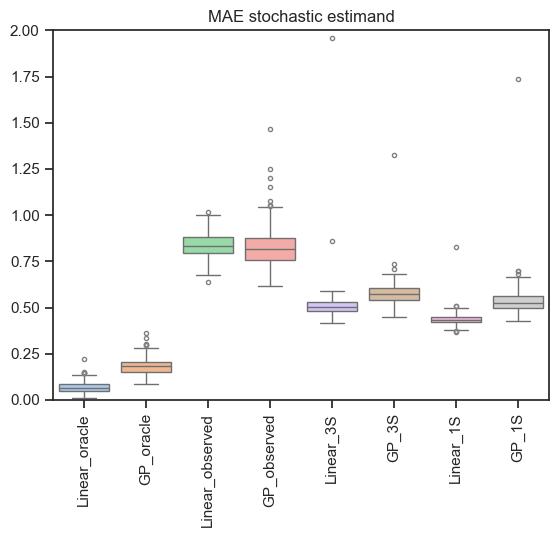

In [16]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'MAE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAE stochastic estimand")
plt.ylim(0,2)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

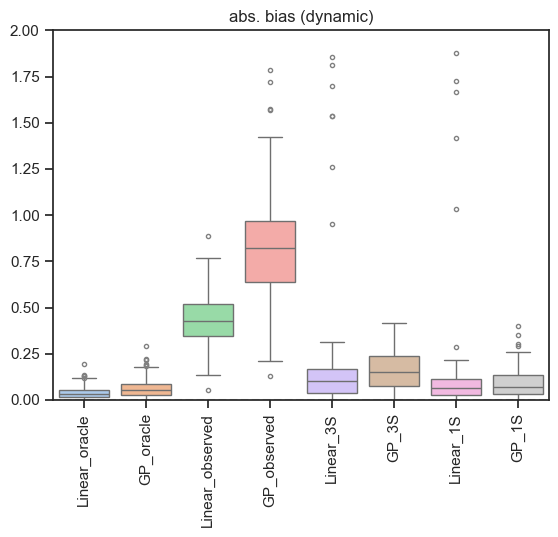

In [18]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (dynamic)")
plt.ylim(0,2)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

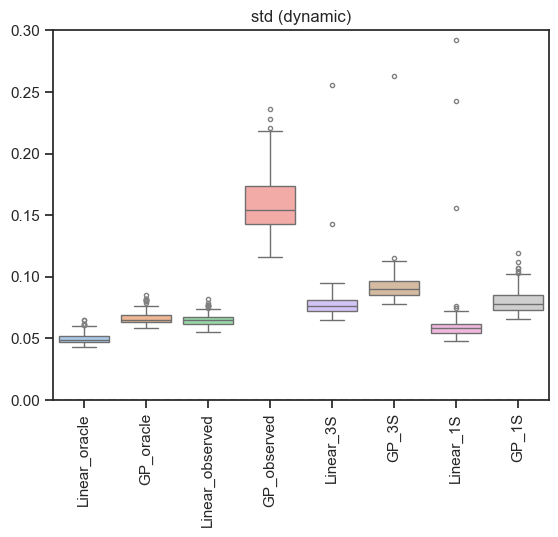

In [20]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (dynamic)")
plt.ylim(0,.3)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

Text(0, 0.5, '')

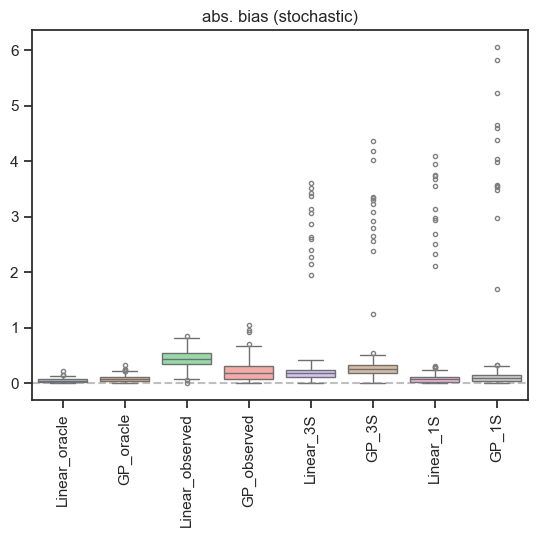

In [21]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (stochastic)")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

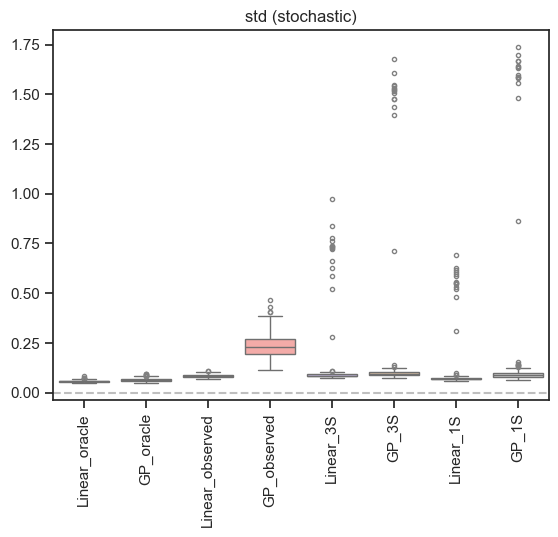

In [22]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (stochastic)")
# plt.ylim(0,.1)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

In [23]:
def format_percentage(value, x=1):
    return f"{value*x:.1f}%"

df_summary_dynamic = df_summary[df_summary["estimand"]=="dynamic"]
# df_summary_dynamic = df_summary[df_summary["estimand"]=="stoch"]
df_summary_dynamic.columns = df_summary_dynamic.columns.droplevel(1)
df_summary_dynamic["coverage"] = df_summary_dynamic["covering"].apply(format_percentage)
df_summary_dynamic["mean_ind_cover"] = df_summary_dynamic["mean_ind_cover"].apply(format_percentage, x=100)
print(df_summary_dynamic)

combined_df_dynamic = combined_df[combined_df["estimand"]=="dynamic"]
# combined_df_dynamic = combined_df[combined_df["estimand"]=="stoch"]
# print(combined_df_dynamic)

  estimand   model    type      mean    median       std    bias     TRUE  \
0  dynamic      GP      1S  2.434097  2.436579  0.149548 -0.0200  2.76079   
1  dynamic      GP      3S  2.388303  2.391031  0.157425 -0.1510  2.76079   
2  dynamic      GP    Obs.  1.896013  1.895939  0.159035 -0.8215  2.76079   
3  dynamic      GP  Oracle  2.664706  2.664781  0.066377 -0.0385  2.76079   
4  dynamic  Linear      1S  2.600171  2.600114  0.077504  0.0145  2.76079   
5  dynamic  Linear      3S  2.501772  2.499303  0.100276 -0.1025  2.76079   
6  dynamic  Linear    Obs.  2.267040  2.266921  0.065140 -0.4260  2.76079   
7  dynamic  Linear  Oracle  2.696540  2.696443  0.050110 -0.0025  2.76079   

     RMSE  RMSE_all     MAE  MAE_all    MAPE   q025    q975  ci_length  \
0  0.6660    0.7225  0.4820   0.5165  1.1865  2.536  2.8390     0.3060   
1  0.7190    0.8565  0.5300   0.6350  1.2005  2.394  2.7410     0.3520   
2  1.5715    1.6150  1.2315   1.2570  3.4295  1.579  2.2085     0.6055   
3  0.3670 

C:\Users\bar21\AppData\Local\Temp\ipykernel_23944\2229529795.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic["coverage"] = df_summary_dynamic["covering"].apply(format_percentage)
C:\Users\bar21\AppData\Local\Temp\ipykernel_23944\2229529795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic["mean_ind_cover"] = df_summary_dynamic["mean_ind_cover"].apply(format_percentage, x=100)


In [24]:
df_summary_dynamic['model_type'] = df_summary_dynamic[['model', 'type']].apply(lambda x: '_'.join(x), axis=1)

print(df_summary_dynamic)


  estimand   model    type      mean    median       std    bias     TRUE  \
0  dynamic      GP      1S  2.434097  2.436579  0.149548 -0.0200  2.76079   
1  dynamic      GP      3S  2.388303  2.391031  0.157425 -0.1510  2.76079   
2  dynamic      GP    Obs.  1.896013  1.895939  0.159035 -0.8215  2.76079   
3  dynamic      GP  Oracle  2.664706  2.664781  0.066377 -0.0385  2.76079   
4  dynamic  Linear      1S  2.600171  2.600114  0.077504  0.0145  2.76079   
5  dynamic  Linear      3S  2.501772  2.499303  0.100276 -0.1025  2.76079   
6  dynamic  Linear    Obs.  2.267040  2.266921  0.065140 -0.4260  2.76079   
7  dynamic  Linear  Oracle  2.696540  2.696443  0.050110 -0.0025  2.76079   

     RMSE  RMSE_all     MAE  MAE_all    MAPE   q025    q975  ci_length  \
0  0.6660    0.7225  0.4820   0.5165  1.1865  2.536  2.8390     0.3060   
1  0.7190    0.8565  0.5300   0.6350  1.2005  2.394  2.7410     0.3520   
2  1.5715    1.6150  1.2315   1.2570  3.4295  1.579  2.2085     0.6055   
3  0.3670 

C:\Users\bar21\AppData\Local\Temp\ipykernel_23944\2384414092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic['model_type'] = df_summary_dynamic[['model', 'type']].apply(lambda x: '_'.join(x), axis=1)


In [25]:
df_summary_dynamic["true"]

KeyError: 'true'

C:\Users\bar21\AppData\Local\Temp\ipykernel_23944\2107373927.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic['categ_pos'] = df_summary_dynamic['model_type'].map(categ_pos)


KeyError: 'true'

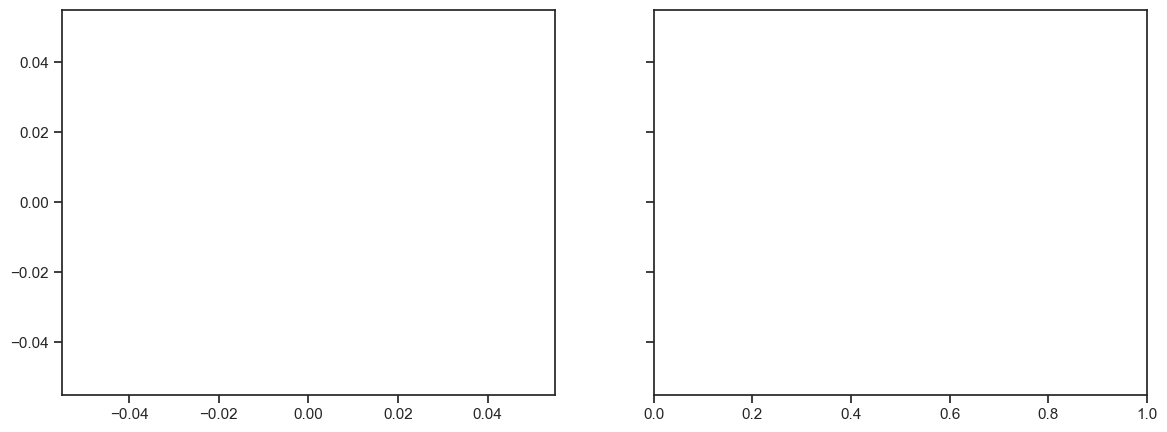

In [26]:
# Plot points with error bars
categories = np.arange(len(df_summary_dynamic['model_type']))
category_labels = df_summary_dynamic['model_type'].unique()

# Create a dictionary to map category positions

# Map categ to positions
model_names = ['True', 'Observed', 'Multi-stage', 'Plug-in']
model_order = ['Linear_Oracle', 'GP_Oracle', 'Linear_Obs.', 'GP_Obs.',
               'Linear_3S', 'GP_3S', 'Linear_1S', 'GP_1S']
categ_pos = {category: pos for pos, category in enumerate(model_order)}
df_summary_dynamic['categ_pos'] = df_summary_dynamic['model_type'].map(categ_pos)
# combined_df_dynamic['categ_pos'] = combined_df_dynamic['model_type'].map(categ_pos)

# Assign colors to categ2
unique_categ2 = df_summary_dynamic['model']
# colors = plt.cm.tab10(np.linspace(0, 1, len(unique_categ2)))
color_map = { "GP" : "tab:orange", "Linear" : "tab:blue"}
# color_map = dict(zip(unique_categ2, colors))

# Plotting
plt.style.use('seaborn-v0_8-colorblind')
# plt.style.use('fast')

fig, axs = plt.subplots(1, 2, figsize=(14, 5),
                        gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
# for ax in axs:
#     ax.set_facecolor('white')
# Plot points with different colors based on categ2
for categ2 in unique_categ2:
    subset = df_summary_dynamic[df_summary_dynamic['type'] == categ2]
    axs[0].scatter(subset['mean'],
                subset['categ_pos'],
                label=f'{categ2}', color=color_map[categ2], s=650)


for i, row in df_summary_dynamic.iterrows():
    axs[0].errorbar(
        row['mean'] - row['true'], 
        row['categ_pos'], 
        xerr=[[row['mean'] - row['q025']],
              [row['q975'] - row['mean']]], 
        fmt='o', 
        # color='black', 
        color = color_map[row['model']], 
        ecolor = color_map[row['model']], 
        # ecolor='black', 
        capsize=5, markersize = 8   
    )
    
    axs[0].annotate(
                    # row['mean_ind_cover'], 
                    row['coverage'], 
                    xy=(row['mean'] - row['true'], row['categ_pos']), 
                    xytext=(0, 13), 
                    textcoords='offset points', 
                    ha='center', 
                    va='top',
                    fontsize=10, 
                    color='black')    

# Customize the x-axis to show category labels
axs[0].set_yticks(np.arange(0.5,len(model_order),2))
# axs[0].set_yticklabels(model_order)
axs[0].set_yticklabels(model_names, fontsize=14, fontweight='bold')
axs[0].set_ylim(-1, len(model_order) - 0.5)
# axs[0].axvline(df_summary_dynamic["true"][0], color='grey', linestyle='--', alpha=0.5)
axs[0].axvline(0, color='black', linestyle='--', alpha=0.3)
axs[0].set_title('Coverage & Mean error (95% CI)', fontsize=16, fontweight='bold')
# axs[0].grid(True)


flierprops = dict(marker='.', markerfacecolor='None', markersize=3,  markeredgecolor='grey')
sns.boxplot(
    data=combined_df_dynamic, 
    # x='MAE', 
    x='RMSE', 
    # x='MAPE', 
    y='method', 
    hue="model", 
    palette=color_map, 
    ax=axs[1],
    flierprops=flierprops
)

axs[1].set_yticks(np.arange(0.5,len(model_order),2))
axs[1].set_ylim(-1, len(model_order) - 0.5)
# axs[1].set_yticklabels([])
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_title('RMSE', fontsize=18, fontweight='bold')
handles, labels = axs[1].get_legend_handles_labels()
ordered_handles = [handles[1], handles[0]]  # Reorder legend
ordered_labels = [labels[1], labels[0]]  # Reorder labels
axs[1].legend(ordered_handles, ordered_labels, title='', loc='upper right', 
              fontsize=13)
# axs[1].grid(True)
plt.tight_layout()
# plt.style.use('seaborn-whitegrid')
axs[0].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='x', labelsize=12)


# plt.savefig('results/figs/nonlin_truncated_parab.png', dpi = 1000)           # Save as PNG file
plt.show()
